In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install plotly
import plotly
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)

shape of x_train:  (60000, 28, 28)
shape of x_test:  (10000, 28, 28)


In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation= 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
     

In [5]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)


Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2970 - accuracy: 0.9138 - val_loss: 0.1424 - val_accuracy: 0.9561
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1431 - accuracy: 0.9572 - val_loss: 0.1022 - val_accuracy: 0.9685
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1087 - accuracy: 0.9671 - val_loss: 0.0846 - val_accuracy: 0.9737
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0897 - accuracy: 0.9720 - val_loss: 0.0800 - val_accuracy: 0.9732
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0752 - accuracy: 0.9764 - val_loss: 0.0761 - val_accuracy: 0.9765
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0685 - accuracy: 0.9783 - val_loss: 0.0710 - val_accuracy: 0.9794
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0586 - accuracy: 0.9808 - val_loss: 0.0723 - val_accuracy:

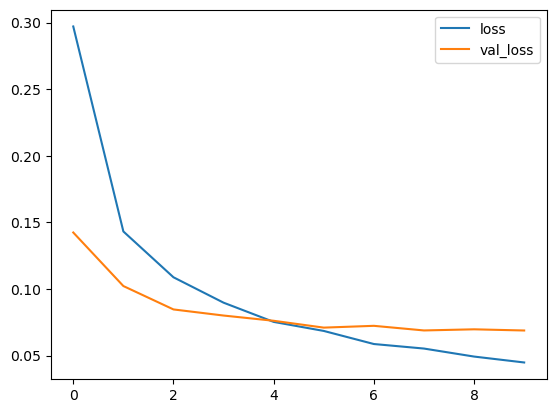

In [6]:
plt.plot(r.history['loss'], label= 'loss')
plt.plot(r.history['val_loss'], label= 'val_loss')
plt.legend()

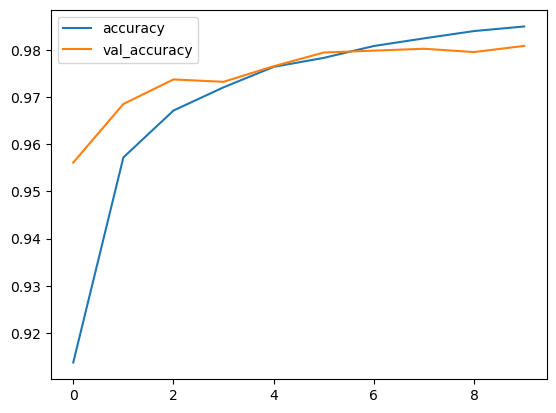

In [7]:
plt.plot(r.history['accuracy'], label= 'accuracy')
plt.plot(r.history['val_accuracy'], label= 'val_accuracy')
plt.legend()

In [8]:
# Evaluation
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0688 - accuracy: 0.9808
[0.06879126280546188, 0.9807999730110168]


313/313 [==============================] - 1s 2ms/step
Confusion matrix without normalization
[[ 974    0    1    0    1    0    1    1    1    1]
 [   0 1121    2    1    0    2    3    1    5    0]
 [   3    1 1013    2    3    0    1    6    3    0]
 [   0    0    4  982    1   13    0    4    3    3]
 [   1    0    4    0  955    0    5    1    2   14]
 [   3    1    0    4    0  876    2    2    3    1]
 [   5    2    0    1    1    6  938    0    5    0]
 [   0    1    7    1    0    0    0 1015    1    3]
 [   6    0    4    4    1    4    3    3  946    3]
 [   0    2    0    2    4    3    0    7    3  988]]


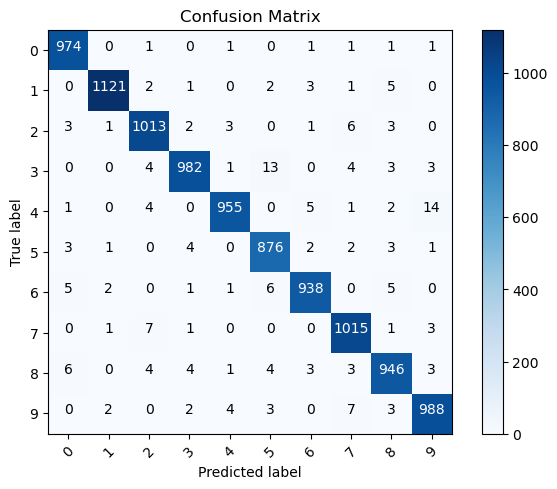

In [9]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title="Confusion Matrix",
                          cmap = plt.cm.Blues):
  
  """
  This function prints and plots the confusion matrix.
  Normalize can be applied by setting 'normalize = True'
  """
  
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    print("Normalized Confusion Matrix")
  
  else:
    print("Confusion matrix without normalization")
  
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment = 'center',
             color = "white" if cm[i, j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))           
     

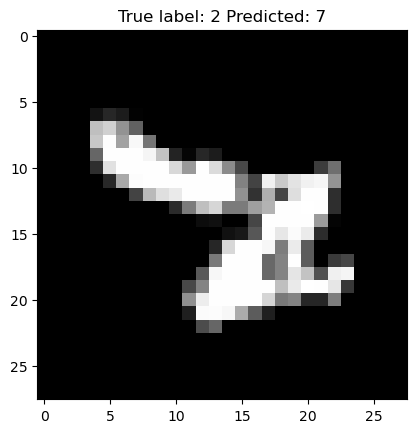

In [10]:
# Plotting few Places where the Model went wrong

misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap= 'gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));

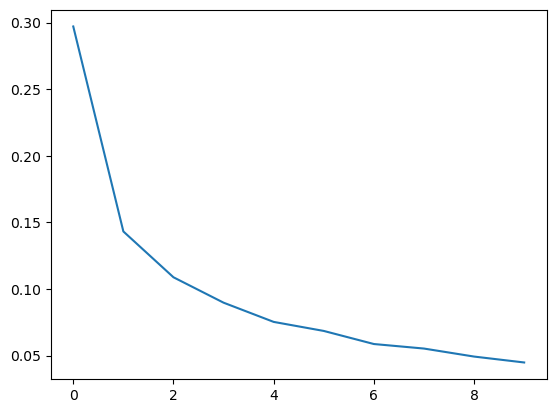

In [11]:
plt.plot(r.history['loss'], label='loss')